# Import Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Wrangling

## Gathering Data

In [3]:
raw_data_path = os.path.join(os.getcwd(), '..', 'data', 'raw_data.csv')

In [4]:
df = pd.read_csv(raw_data_path)
df.head()

,unit_name,bedroom,bathroom,beds,guests,type,unit_id,wifi,tv,cable_tv,...,room_name,booking_received_timestamp,booking_check_in,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
0,Apartment - 1 Lantai 1,1,1.0,1.0,2.0,Bingin Ombak Apartment - 1 Lantai 1,UN1539,1,0,0,...,Bingin Ombak Apartment - 1 Lantai 1,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
1,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
2,Apartment - 2 Lantai 2,1,1.0,1.0,2.0,Bingin Ombak Apartment - 2 Lantai 2,UN1540,1,0,0,...,Bingin Ombak Apartment - 2 Lantai 2,2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
3,Standard 2,1,2.0,1.0,2.0,Standard,UN1536,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06
4,Standard 1,1,2.0,1.0,2.0,Standard,UN0165,1,0,0,...,Standard (PLEASE IGNORE),2022-10-13 10:24,2023-01-02,2023-01-06,81,4,NaN,4.0,5911197.97,1.477799e+06


In [5]:
print("Dataset Bukit Vista memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista memiliki 78010 baris dan 47 kolom


## Assesing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78010 entries, 0 to 78009
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_name                   78010 non-null  object 
 1   bedroom                     78010 non-null  int64  
 2   bathroom                    77920 non-null  float64
 3   beds                        77920 non-null  float64
 4   guests                      77920 non-null  float64
 5   type                        78010 non-null  object 
 6   unit_id                     78010 non-null  object 
 7   wifi                        78010 non-null  int64  
 8   tv                          78010 non-null  int64  
 9   cable_tv                    78010 non-null  int64  
 10  ac                          78010 non-null  int64  
 11  workspace                   78010 non-null  int64  
 12  essentials                  78010 non-null  int64  
 13  hot_water                   780

In [7]:
df.isnull().sum()

unit_name                         0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
type                              0
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           0
washer                      

In [8]:
df.describe()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,essentials,...,property_bedrooms,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned,average_daily_rate
count,78010.000000,77920.000000,77920.000000,77920.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.000000,78010.0,...,78010.000000,77816.000000,77816.000000,45343.000000,78010.000000,78010.000000,72671.000000,77230.000000,7.801000e+04,7.801000e+04
mean,1.035137,1.054864,1.047857,2.086679,0.978823,0.532265,0.089796,0.974696,0.899282,1.0,...,13.234765,-8.761119,115.146185,670.379297,28.425099,3.539892,0.631665,4.404959,2.296312e+06,6.777725e+05
std,0.306131,0.383144,0.324730,0.522380,0.143974,0.498961,0.285891,0.157049,0.300957,0.0,...,7.730403,0.103751,0.388802,1414.130566,40.994812,3.830646,0.487256,0.942341,2.977614e+06,6.287251e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,1.000000,-8.837896,110.360967,12.924400,-1.000000,1.000000,-1.000000,1.000000,-2.590644e+06,-2.590644e+06
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,...,6.000000,-8.822391,115.087110,65.860300,2.000000,2.000000,0.600000,4.000000,8.501970e+05,3.801168e+05
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,13.000000,-8.809038,115.113060,402.195000,12.000000,3.000000,0.900000,5.000000,1.463267e+06,5.001512e+05
75%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,...,22.000000,-8.678881,115.133906,761.362000,37.000000,4.000000,0.900000,5.000000,2.700462e+06,7.801720e+05
max,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,27.000000,-7.728722,115.586846,14402.100000,333.000000,91.000000,1.000000,5.000000,6.137459e+07,1.003399e+07


In [9]:
for column_name in df.columns:
    # Get distinct values for each column
    distinct_values = df[column_name].unique()
    
    # Print column name and distinct values
    print("Column Name:", column_name)
    print("Distinct Values:", distinct_values, "\n")

Column Name: unit_name
Distinct Values: ['Apartment - 1 Lantai 1' 'Apartment - 2 Lantai 2' 'Standard 2'
 'Standard 1' 'Standard 3' 'Standard 4' 'Room 06 (Downstairs)'
 'Room 05 (Downstairs)' 'Room 10 (Upstairs)' 'Room 09 (Upstairs)'
 'Room 08 (Upstairs)' 'Room 04 (Downstairs)' 'Room 07 (Downstairs)'
 'Me Villa A' 'E' 'C' 'B' 'D' 'Room 01' 'Room 04' 'Room 12' 'Room 11'
 'Room 03' 'Room 09' 'Room 10' 'Room 02' 'Room 05' '224' '220' '101' '219'
 '222' '214' '215' '216' '218' '221' '217' '105' '106' '107' '104'
 'Standard 4A' 'Standard 3A' 'Bungalow 2' 'Bungalow 3' 'Bungalow 4'
 'Bungalow 1' 'Room 4' 'Room 1' 'Unit 5 (Upstairs)' 'Unit 4 (Upstairs)'
 'Unit 3 (Upstairs)' 'Unit 2 (Downstairs)' 'Unit 1 (Downstairs)'
 'Bungalow 5' 'Wooden 103' 'Pondok Lulik - Wooden 102 #T'
 'Room 08 Downstairs' 'Room 07 Downstairs' 'Room 19' 'Room 18'
 'Room 09 Downstairs' 'Room 10 Downstairs' 'Room 16 Upstairs' 'Room 20'
 'Room 21' 'Room 22' 'Room 23' 'Guesthouse 3' 'Guesthouse 2'
 'Guesthouse 1' 'Guesthouse 

In [10]:
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 17259


## Cleaning Data

In [11]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()

columns_to_impute = ['bathroom', 
                     'beds', 
                     'guests', 
                     'lat', 
                     'lng', 
                     'distance_to_coastline', 
                     'review_sentiment_score', 
                     'rating']

# Perform imputation only on selected columns
imputed_values = mice_imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame from imputed values
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace original columns with imputed values
df[columns_to_impute] = imputed_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [12]:
# Convert float columns to int
df['bathroom'] = df['bathroom'].astype(int)
df['beds'] = df['beds'].astype(int)
df['guests'] = df['guests'].astype(int)

# Convert object columns to datetime
df['booking_received_timestamp'] = pd.to_datetime(df['booking_received_timestamp'])
df['booking_check_in'] = pd.to_datetime(df['booking_check_in'])
df['booking_check_out'] = pd.to_datetime(df['booking_check_out'])

In [13]:
# List of column names to drop
columns_to_drop = ['unit_name',
                   'type',
                   'unit_id', 
                   'essentials', 
                   'property_bedrooms',
                   'booking_received_timestamp',
                   'booking_check_in',
                   'booking_check_out']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
duplicated_row_count = df.duplicated().sum()

# Print the count of duplicated rows
print("Number of duplicated rows:", duplicated_row_count)

Number of duplicated rows: 27282


In [15]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 0


In [16]:
print("Dataset Bukit Vista setelah preprocessing memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista setelah preprocessing memiliki 50728 baris dan 39 kolom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50728 entries, 0 to 78008
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedroom                 50728 non-null  int64  
 1   bathroom                50728 non-null  int64  
 2   beds                    50728 non-null  int64  
 3   guests                  50728 non-null  int64  
 4   wifi                    50728 non-null  int64  
 5   tv                      50728 non-null  int64  
 6   cable_tv                50728 non-null  int64  
 7   ac                      50728 non-null  int64  
 8   workspace               50728 non-null  int64  
 9   hot_water               50728 non-null  int64  
 10  parking                 50728 non-null  int64  
 11  pool                    50728 non-null  int64  
 12  gym                     50728 non-null  int64  
 13  private_entrance        50728 non-null  int64  
 14  luggage_drop_off        50728 non-null

In [18]:
data_to_plot = df.drop(['property_name', 'room_name'], axis=1)

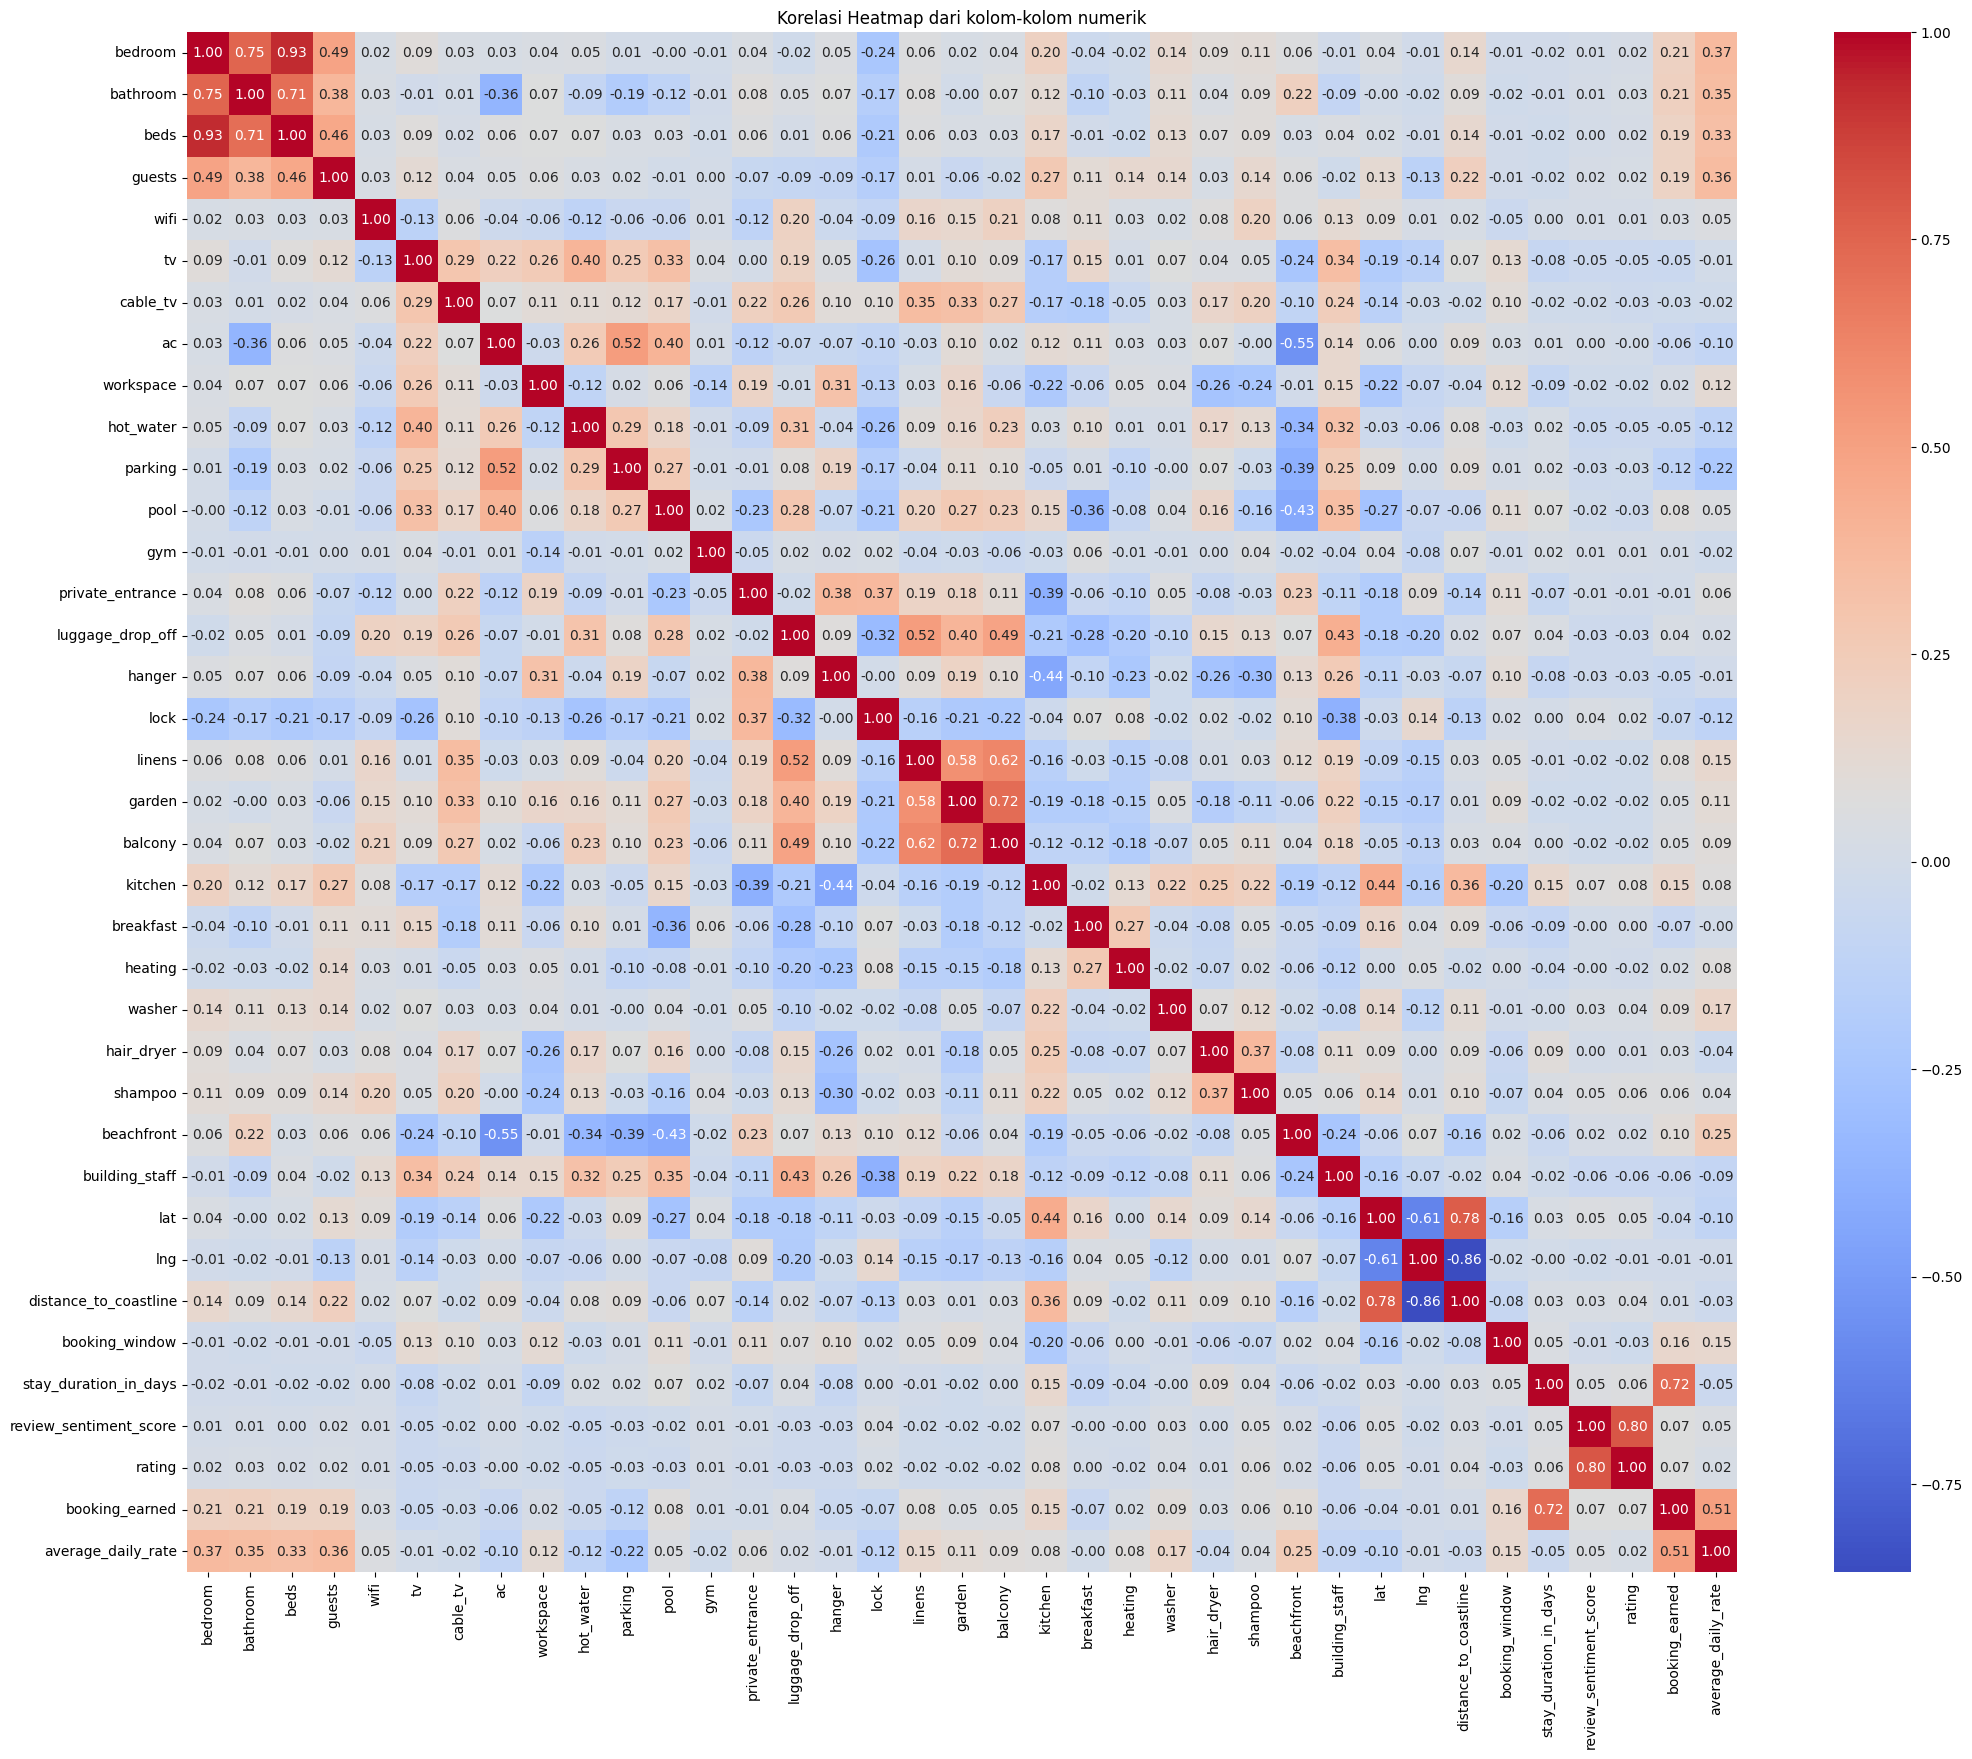

(50728, 39)

In [19]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()
df.shape

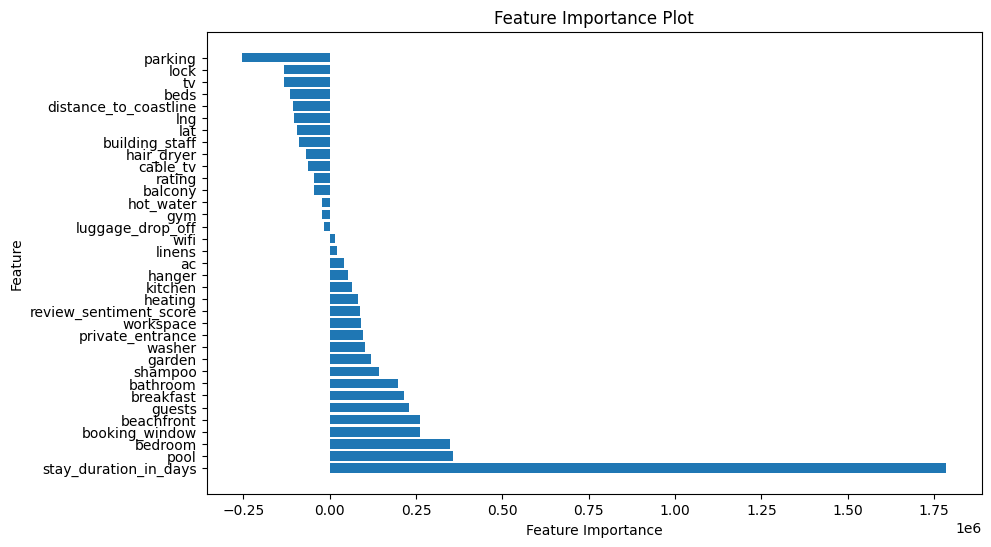

Mean Absolute Error: 703610.329136735


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Assuming numeric_columns is your DataFrame containing numeric features
# and 'average_daily_rate' is your target variable
tes = numeric_columns.drop(columns=['average_daily_rate'])

# Separate features and target variable
X = tes.drop(columns=['booking_earned'])  # Features
y = tes['booking_earned']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = model.coef_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

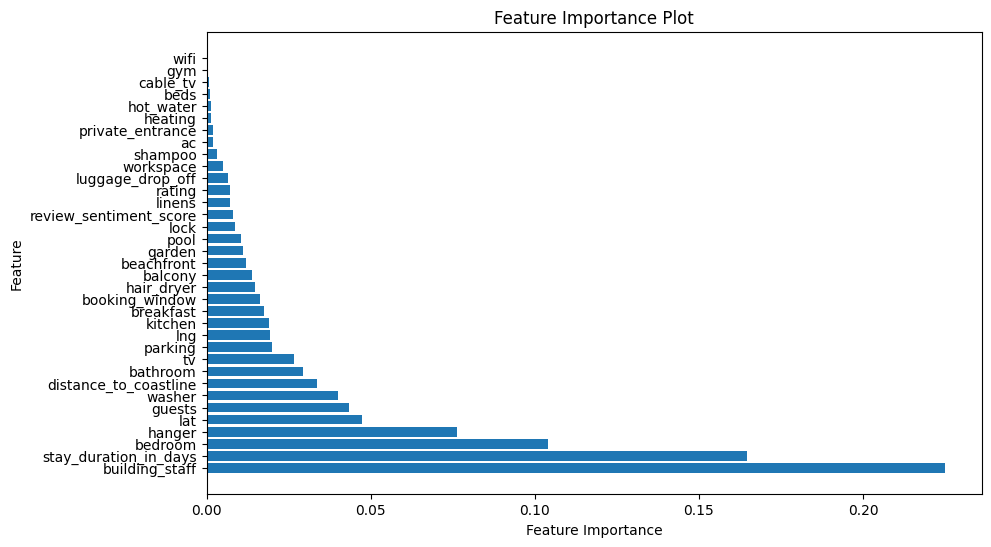

Mean Absolute Error: 226843.22442372612


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Assuming numeric_columns is your DataFrame containing numeric features
# and 'average_daily_rate' is your target variable
tes = numeric_columns.drop(columns=['average_daily_rate'])

# Separate features and target variable
X = tes.drop(columns=['booking_earned'])  # Features
y = tes['booking_earned']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 10160462364672.0000 - val_loss: 10362458996736.0000
Epoch 2/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10084169023488.0000 - val_loss: 9219845652480.0000
Epoch 3/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8003692003328.0000 - val_loss: 7387655176192.0000
Epoch 4/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6521475825664.0000 - val_loss: 5884224733184.0000
Epoch 5/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5546066837504.0000 - val_loss: 5086395760640.0000
Epoch 6/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4614703284224.0000 - val_loss: 4676771643392.0000
Epoch 7/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4081394647040.0000 - val_loss: 4396623069184.0000
Epoch 8/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3698559287296.0000 - val_loss: 4149173813248.0000
Epoch 9/100
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3584516685824.0000 - val_loss: 39196386918

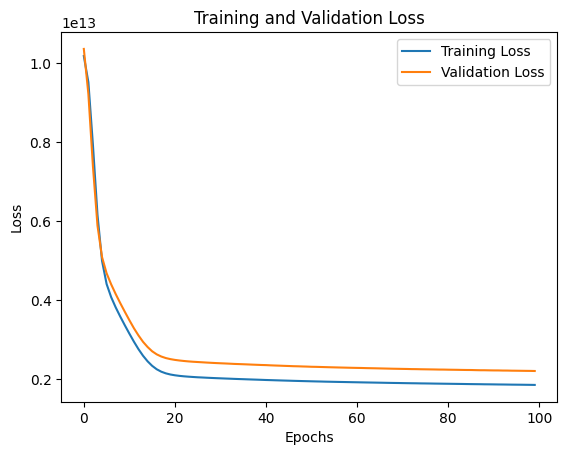

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers

# Assuming numeric_columns is your DataFrame containing numeric features
# and 'average_daily_rate' is your target variable
tes = numeric_columns.drop(columns=['average_daily_rate'])

# Separate features and target variable
X = tes.drop(columns=['booking_earned'])  # Features
y = tes['booking_earned']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize TensorFlow model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming numeric_columns is your DataFrame containing numeric features
# and 'average_daily_rate' is your target variable
tes = numeric_columns.drop(columns=['average_daily_rate'])

# Separate features and target variable
X = tes.drop(columns=['booking_earned'])  # Features
y = tes['booking_earned']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(fi_df)

Mean Absolute Error: 79484.91902045219

Feature Importances:
                   Feature  Importance
32   stay_duration_in_days    0.557130
31          booking_window    0.104688
30   distance_to_coastline    0.069708
28                     lat    0.058680
0                  bedroom    0.040917
33  review_sentiment_score    0.040006
2                     beds    0.029020
29                     lng    0.024788
3                   guests    0.020697
10                 parking    0.012116
34                  rating    0.008715
1                 bathroom    0.006021
15                  hanger    0.005453
5                       tv    0.003786
24              hair_dryer    0.003360
21               breakfast    0.001636
20                 kitchen    0.001281
11                    pool    0.001264
23                  washer    0.001052
14        luggage_drop_off    0.001029
16                    lock    0.001014
8                workspace    0.000983
18                  garden    0.000949
13 